In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,r2_score,plot_roc_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [175]:
data=pd.read_csv('C:\Data Scientist Internship Projects\Automobile_insurance_fraud.csv')

In [176]:
pd.get_option("display.max_columns")
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [177]:
data.shape

(1000, 40)

In [178]:
cols=['witnesses','bodily_injuries','capital-gains']

In [179]:
## I am filling the null columns:
for col in cols:
    data[col]=data[col].replace(0,np.nan)

In [180]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                   508
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [181]:
data['bodily_injuries']=data['bodily_injuries'].fillna((data['bodily_injuries']).mean())
data['witnesses']=data['witnesses'].fillna((data['witnesses']).mean())
data['capital-gains']=data['capital-gains'].fillna((data['capital-gains']).mean())
data['months_as_customer']=data['months_as_customer'].fillna((data['months_as_customer']).mean())

In [182]:
data.info()
## There is no null data except_c39

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [183]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,51069.308943,-26793.700000,11.644000,1.83900,1.503030,1.980027,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,11151.443012,28104.096686,6.951373,1.01888,0.406398,0.707956,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,800.000000,-111100.000000,0.000000,1.00000,1.000000,1.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,51069.308943,-51500.000000,6.000000,1.00000,1.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,51069.308943,-23250.000000,12.000000,1.00000,1.503030,1.980027,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51076.981707,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [184]:
data['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [185]:
## policy_state' doesnot have any direct relation with fraud reported
pd.crosstab(data['policy_state'],data['fraud_reported'], margins=True)

fraud_reported,N,Y,All
policy_state,,,
IL,261,77,338
IN,231,79,310
OH,261,91,352
All,753,247,1000


In [186]:
## Fraud Reported is Dependent Variable
## other Variables are independent variable
data['fraud_reported'].value_counts()
## i convert it by label encoding
labelencoder=LabelEncoder()
data['fraud_reported']=labelencoder.fit_transform(data['fraud_reported'])

In [187]:
data['insured_sex'].value_counts()
## More Females than number of male

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [188]:
data['insured_sex']=labelencoder.fit_transform(data['insured_sex'])

In [189]:
##police_report_available
data['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [190]:
data['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [191]:
data['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [192]:
data['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
golf              55
camping           55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [193]:
data['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

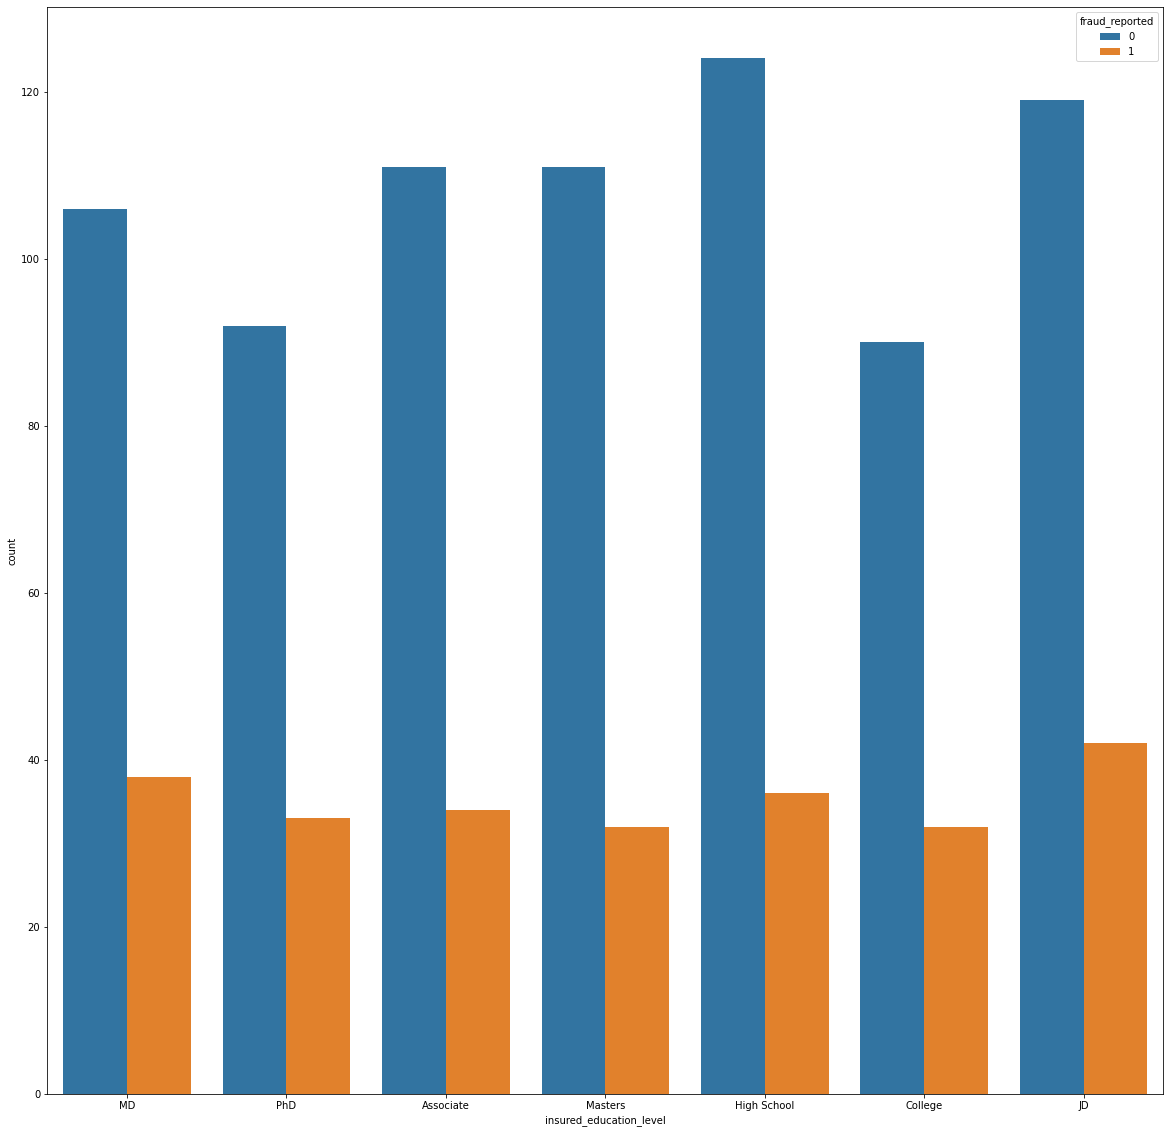

In [194]:
ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='insured_education_level',hue='fraud_reported',data=data)

In [195]:
## We Can Check That Fraud Reports is almost similar for every Education level different hence
##i am not using ordinal encoder,i am using normal label encoder to transform
data['insured_education_level']=labelencoder.fit_transform(data['insured_education_level'])

In [196]:
##i want to check relation of some objective columns with fraud reporting:
## policy_csl, incident_type, police_report_available , property_damage

In [197]:
## It shows whether police report available or not it doesnot impact fraud reported, hence i can use label encoder
pd.crosstab(data['police_report_available'],data['fraud_reported'], margins=True)

fraud_reported,0,1,All
police_report_available,,,
?,254,89,343
NO,257,86,343
YES,242,72,314
All,753,247,1000


In [198]:
## Property_damage doesnot have any relation with fraud report directly hence i can use label encoder for tranformation
pd.crosstab(data['property_damage'],data['fraud_reported'], margins=True)

fraud_reported,0,1,All
property_damage,,,
?,257,103,360
NO,272,66,338
YES,224,78,302
All,753,247,1000


In [199]:
## policy_csl does not have any kind of relation pattern with 0 and 1 hence use label encoder
pd.crosstab(data['policy_csl'],data['fraud_reported'], margins=True)

fraud_reported,0,1,All
policy_csl,,,
100/300,259,90,349
250/500,259,92,351
500/1000,235,65,300
All,753,247,1000


In [200]:
##incident_type features does not make any direct sense with fraud reported , hence use labelencoder
pd.crosstab(data['incident_type'],data['fraud_reported'], margins=True)

fraud_reported,0,1,All
incident_type,,,
Multi-vehicle Collision,305,114,419
Parked Car,76,8,84
Single Vehicle Collision,286,117,403
Vehicle Theft,86,8,94
All,753,247,1000


In [201]:
## Hence no relation of incident_severity features with fraud reported
pd.crosstab(data['incident_severity'],data['fraud_reported'], margins=True)

fraud_reported,0,1,All
incident_severity,,,
Major Damage,109,167,276
Minor Damage,316,38,354
Total Loss,244,36,280
Trivial Damage,84,6,90
All,753,247,1000


In [202]:
data['insured_occupation']=labelencoder.fit_transform(data['insured_occupation'])
data['auto_make']=labelencoder.fit_transform(data['auto_make'])
data['incident_city']=labelencoder.fit_transform(data['incident_city'])
data['authorities_contacted']=labelencoder.fit_transform(data['authorities_contacted'])
data['collision_type']=labelencoder.fit_transform(data['collision_type'])
data['incident_type']=labelencoder.fit_transform(data['incident_type'])
data['policy_csl']=labelencoder.fit_transform(data['policy_csl'])
data['policy_state']=labelencoder.fit_transform(data['policy_state'])
data['property_damage']=labelencoder.fit_transform(data['property_damage'])
data['incident_severity']=labelencoder.fit_transform(data['incident_severity'])
data['police_report_available']=labelencoder.fit_transform(data['police_report_available'])

In [203]:
## Dropping Unnecessary columns which have not any use for fraud prediction
## No Data Hence Drop _c39 and insured hobbies have nothing to do with prediction
data1=data.drop(['_c39','policy_number','insured_relationship','auto_model','incident_date','insured_hobbies','injury_claim','property_claim','vehicle_claim','policy_bind_date','incident_location','incident_hour_of_the_day','incident_state'],axis=1)

In [204]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   int32  
 9   insured_education_level      1000 non-null   int32  
 10  insured_occupation           1000 non-null   int32  
 11  capital-gains                1000 non-null   float64
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

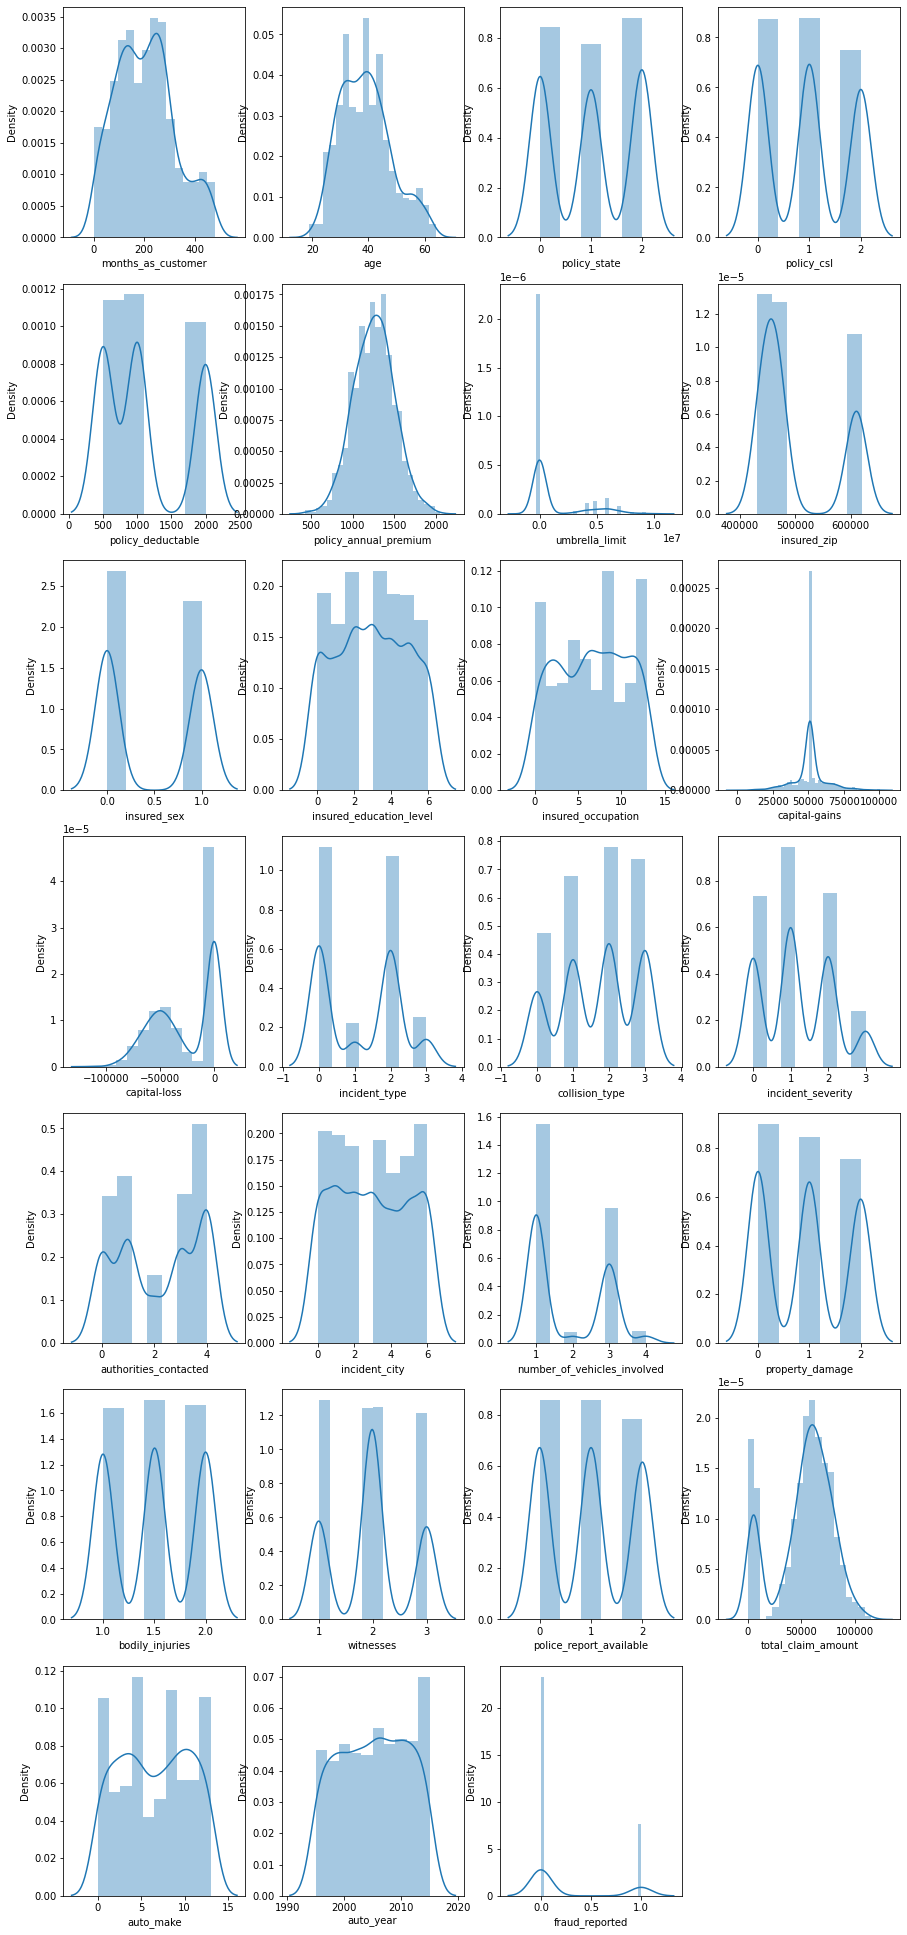

In [205]:
## for showing the skewness
plt.figure(figsize=(15,50))
plotnumber=1
for column in data1:
    if plotnumber<=27:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

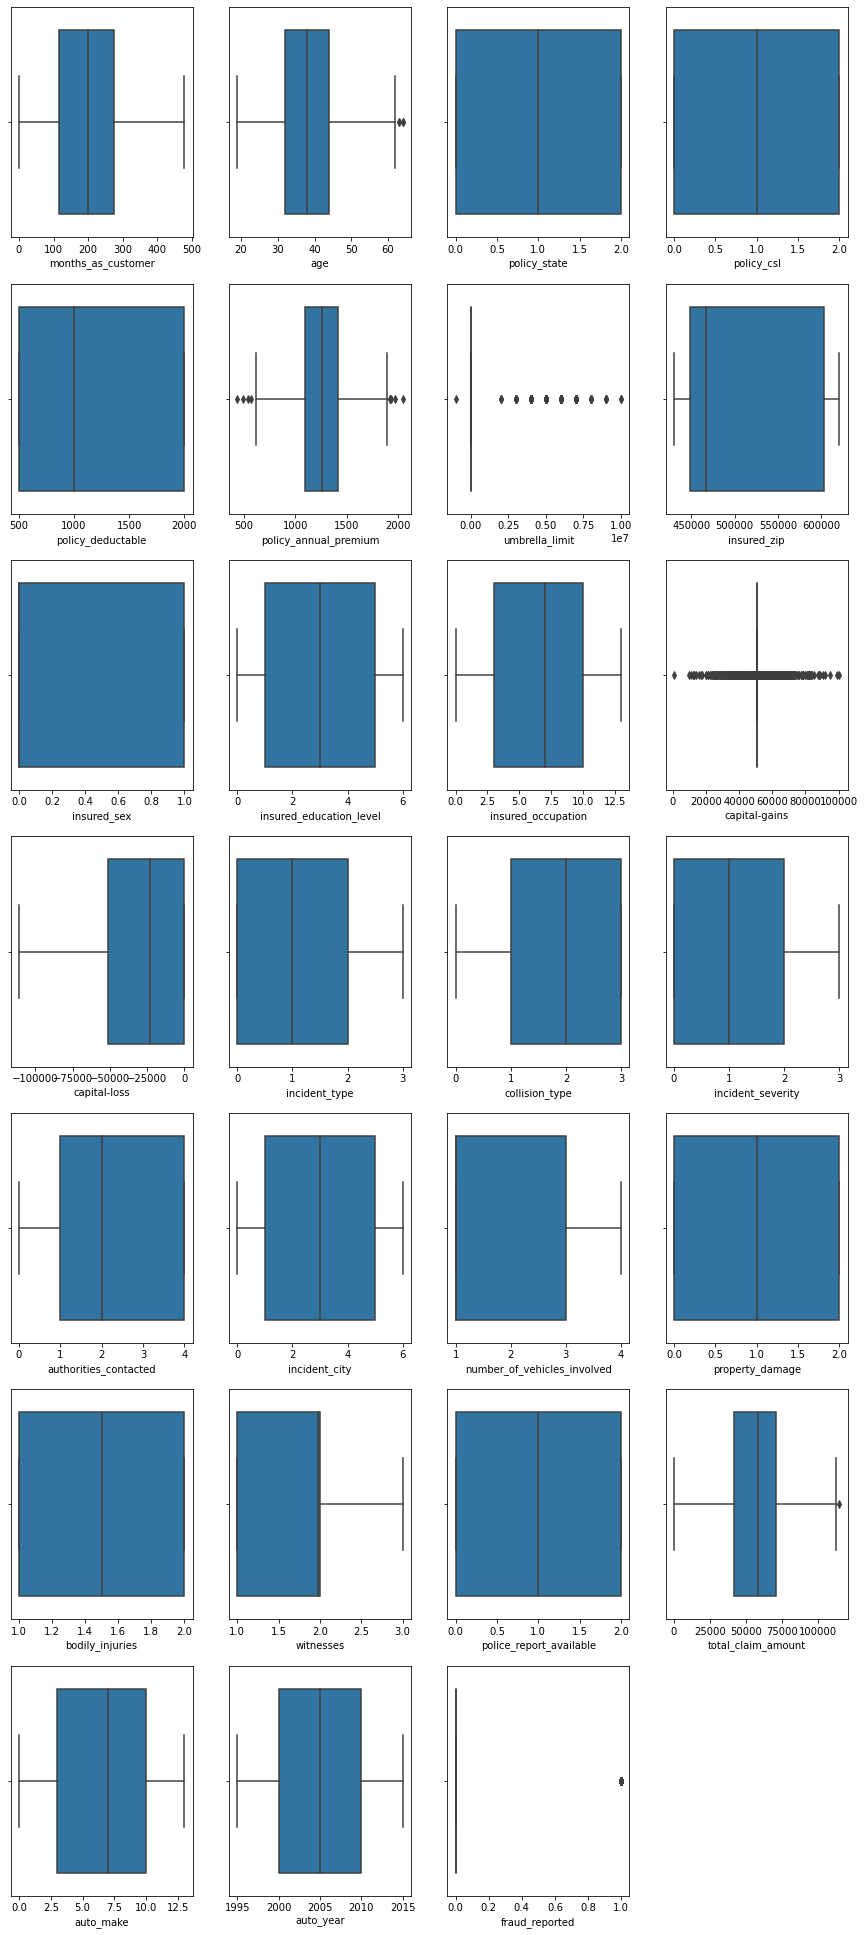

In [206]:
## for Detecting the Outliers
plt.figure(figsize=(15,50))
graph=1
for column in data1:
    if graph<=27:
        ax=plt.subplot(10,4,graph)
        sns.boxplot(data1[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [207]:
##Very High Outliers in Umbrella Limit Hence I am removing the column and removing outliers from policy_annual_premium
data2=data1.drop(['umbrella_limit'],axis=1)

In [208]:
## There are some outliers in umbrella limit and policy_annual_premium
## By using Zscore
from scipy.stats import zscore
z_score= zscore(data2[['policy_annual_premium']])
abs_z_score= np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
datanew=data2[filtering_entry]

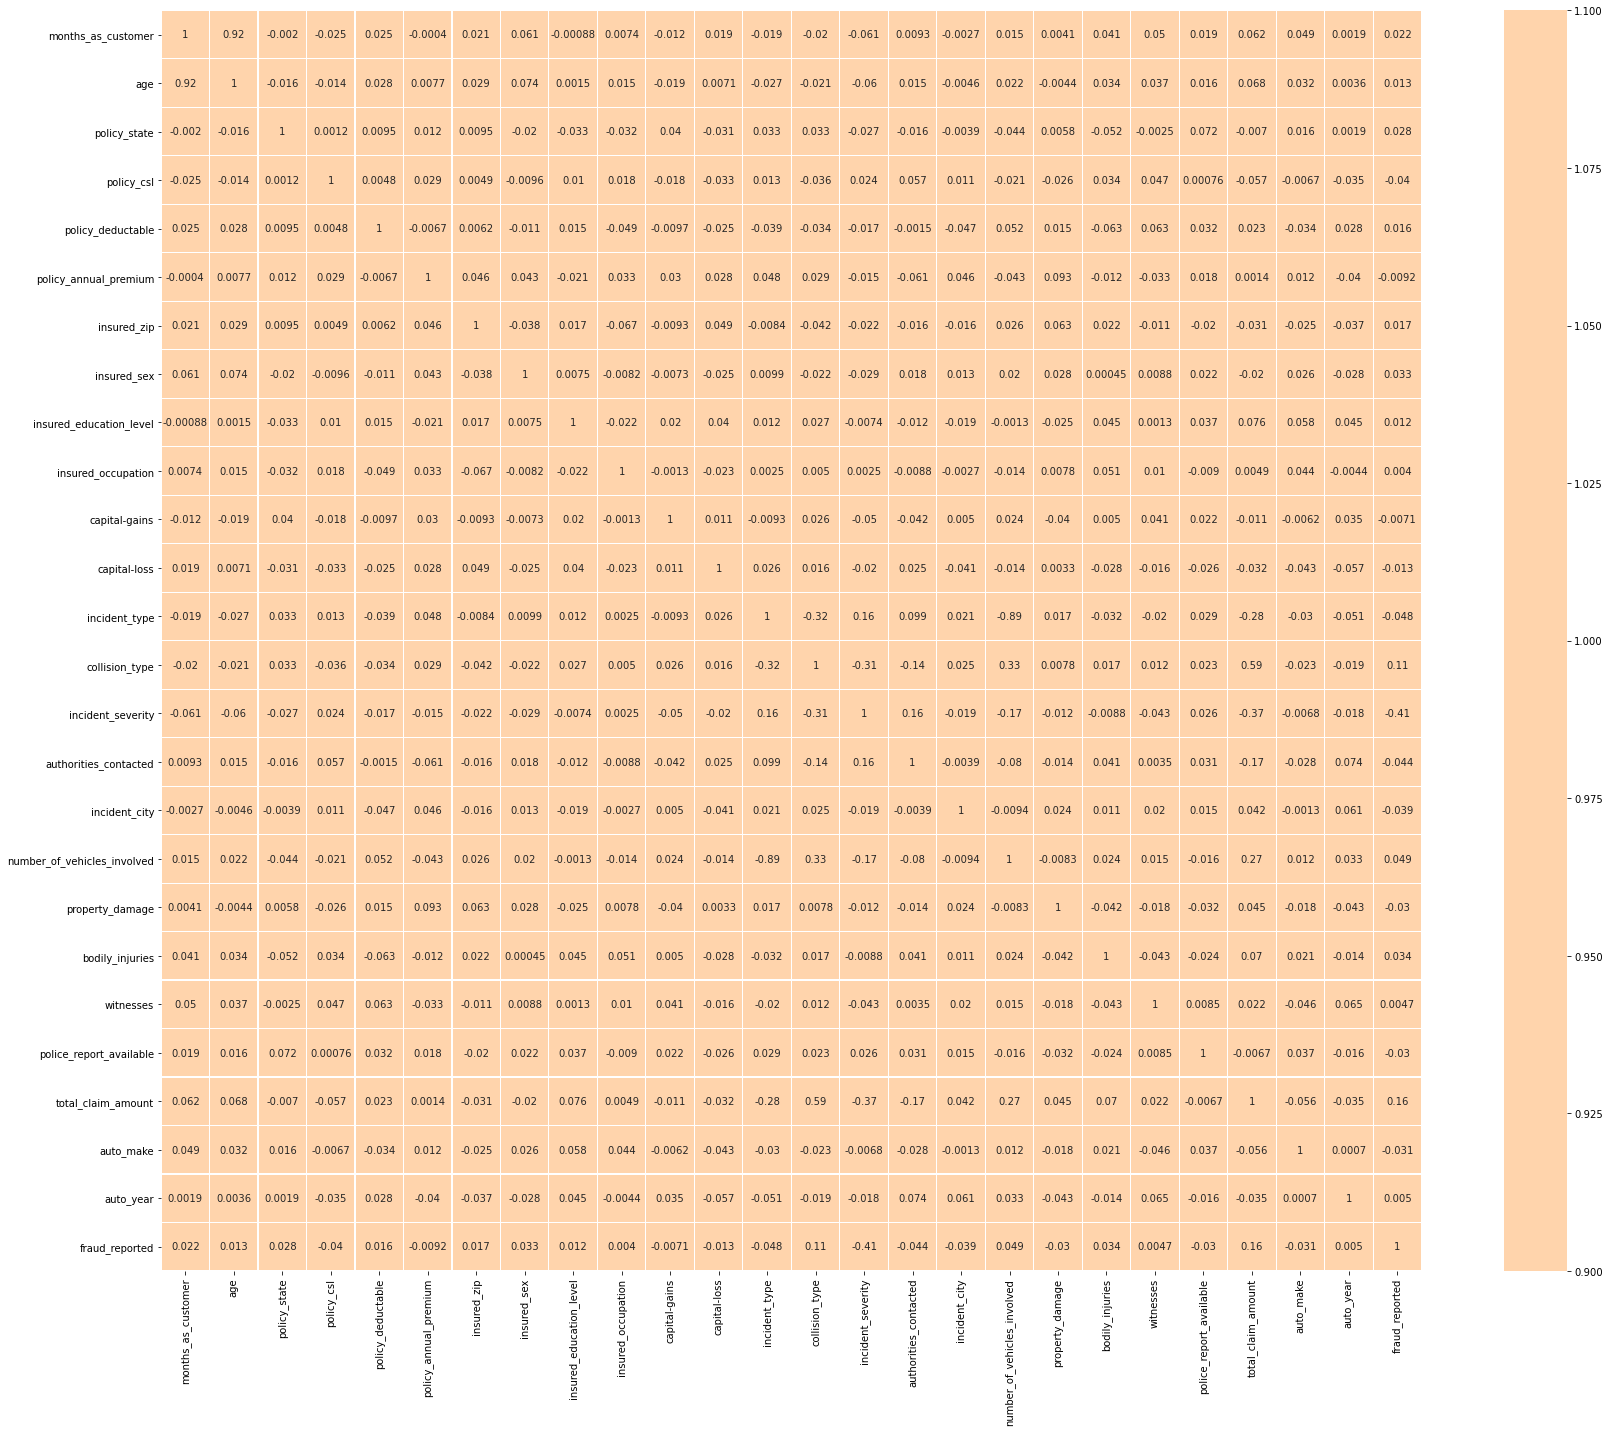

In [209]:
data_corr=datanew.corr()
plt.figure(figsize=(25,20))
sns.heatmap(data_corr,vmin=1,vmax=1,annot=True,square=True,center=0,fmt='0.2g',linewidths=.1)
plt.tight_layout()

In [210]:
x1=datanew.drop(columns='fraud_reported',axis=1)
y1=datanew[['fraud_reported']]

In [211]:
scalar=StandardScaler()
X=scalar.fit_transform(x1)
X

array([[ 1.07529838,  0.98819042,  1.18469967, ...,  0.71448837,
         0.85780607, -0.18206842],
       [ 0.20640033,  0.33151911, -0.01932232, ..., -1.80887593,
         0.36129945,  0.31707608],
       [-0.61036385, -1.09126871,  1.18469967, ..., -0.68712787,
        -0.63171379,  0.31707608],
       ...,
       [-0.64511977, -0.54404262,  1.18469967, ...,  0.55862683,
         1.10605938, -1.51312044],
       [ 2.20486586,  2.52042346, -1.2233443 , ..., -0.21954323,
        -1.37647371, -1.18035744],
       [ 2.1874879 ,  2.30153302,  1.18469967, ..., -1.80925516,
         0.36129945,  0.31707608]])

In [212]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=x1.columns
vif

,vif,features
0,6.754188,months_as_customer
1,6.760259,age
2,1.021043,policy_state
3,1.017581,policy_csl
4,1.025588,policy_deductable
5,1.030939,policy_annual_premium
6,1.026790,insured_zip
7,1.021917,insured_sex
8,1.025964,insured_education_level
9,1.016534,insured_occupation


In [213]:
#Months as customer and Age has multicollinearity hence remove months as customer from dataset
x2=x1.drop('months_as_customer',axis=1)

In [214]:
## Repeting the Steps
scalar=StandardScaler()
X=scalar.fit_transform(x2)
X

array([[ 0.98819042,  1.18469967,  0.06232709, ...,  0.71448837,
         0.85780607, -0.18206842],
       [ 0.33151911, -0.01932232,  0.06232709, ..., -1.80887593,
         0.36129945,  0.31707608],
       [-1.09126871,  1.18469967, -1.18047504, ..., -0.68712787,
        -0.63171379,  0.31707608],
       ...,
       [-0.54404262,  1.18469967,  0.06232709, ...,  0.55862683,
         1.10605938, -1.51312044],
       [ 2.52042346, -1.2233443 ,  1.30512921, ..., -0.21954323,
        -1.37647371, -1.18035744],
       [ 2.30153302,  1.18469967,  0.06232709, ..., -1.80925516,
         0.36129945,  0.31707608]])

In [215]:
x_train,x_test,y_train,y_test=train_test_split(X,y1,test_size=0.20,random_state=51)

In [216]:
x_train.shape, x_test.shape

((797, 24), (200, 24))

In [217]:
Regression=LogisticRegression()
Regression.fit(x_train,y_train)

LogisticRegression()

In [218]:
Regression.score(x_train,y_train)

0.7979924717691342

In [219]:
Regression.score(x_test,y_test)

0.82

In [220]:
##Logistic Regression is giving 82% Accuracy

In [221]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [222]:
## We can see that Type I and Type II Errors Both are very low
cfm= confusion_matrix(y_test,y_pred)
cfm

array([[148,   9],
       [ 41,   2]], dtype=int64)

In [223]:
## Accuracy is one hence 100% Score
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.78      0.94      0.86       157
           1       0.18      0.05      0.07        43

    accuracy                           0.75       200
   macro avg       0.48      0.49      0.46       200
weighted avg       0.65      0.75      0.69       200



In [224]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
lr=LogisticRegression()
kn=KNeighborsClassifier()

In [225]:
## Training with These Classifiers
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
lr.fit(x_train,y_train)
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [226]:
## Check The Scores
dt.score(x_test,y_test)

0.71

In [227]:
rf.score(x_test,y_test)

0.82

In [228]:
lr.score(x_test,y_test)

0.82

In [229]:
kn.score(x_test,y_test)

0.75

In [230]:
## Cross Validation to check overfitting
## There might be some overfitting because now score is 73% 
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(),X,y1,cv=5)
cross_val_score(knn,X,y1,cv=5).mean()

0.7392361809045227

In [231]:
## ROC AUC Curve Scoring

In [232]:
roc_auc_score(y_test,rf.predict(x_test))

0.6742704784476374

In [233]:
roc_auc_score(y_test,lr.predict(x_test))

0.6827136720485854

In [234]:
roc_auc_score(y_test,kn.predict(x_test))

0.4945933935713228

In [235]:
roc_auc_score(y_test,dt.predict(x_test))

0.6042067841801215

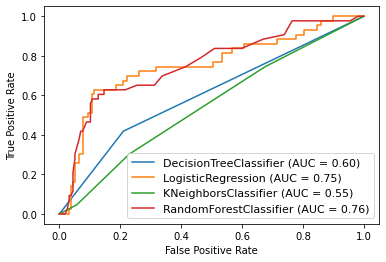

In [236]:
disp =plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [ ]:
## as given above Random Forest Classifier is best for above Data Set
## HYPER PARAMETER TUNING FOR RANDOM FOREST CLASSIFIER

In [237]:
## Applying Boosting Techniques Ada Boost and comparison
from sklearn.ensemble import AdaBoostClassifier

In [238]:
ada= AdaBoostClassifier(base_estimator=lr)
ada.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=LogisticRegression())

In [239]:
y_pred=ada.predict(x_test)

In [240]:
print(accuracy_score(y_test,y_pred))

0.81


In [241]:
#Hyperparameter Tuning for AdaBoost using Grid Search CV and Comparison with Logistic Regression as taking base model

In [242]:
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[40,42,48,50,58],'learning_rate':[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]}

In [243]:
grd_ada=GridSearchCV(AdaBoostClassifier(),params)

In [244]:
grd_ada.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9],
                         'n_estimators': [40, 42, 48, 50, 58]})

In [245]:
grd_ada.best_estimator_

AdaBoostClassifier(learning_rate=0.1)

In [246]:
ada= AdaBoostClassifier(base_estimator=dt,learning_rate=0.1)

In [247]:
ada.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.1)

In [248]:
print(accuracy_score(y_test,y_pred))

0.81


In [249]:
## There is not any difference from hyperparameter tuning of AdaBoost